In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import scipy.stats as st
from scipy.integrate import quad
import sklearn.gaussian_process as gp
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
import pandas as pd
import os
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
import random


%matplotlib inline
np.set_printoptions(precision=2,suppress=True)

In [3]:
def calculate_cfd(arr):
    sorted_arr = sorted(arr)
    cfd = [i+1 for i in range(len(sorted_arr))]
    return cfd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
x, y= np.load("/content/drive/MyDrive/UofT_Courses/MIE1666_ML/3_ML_Project/mass_batch.npy"), np.load("/content/drive/MyDrive/UofT_Courses/MIE1666_ML/3_ML_Project/res_v.npy")

<class 'numpy.ndarray'>


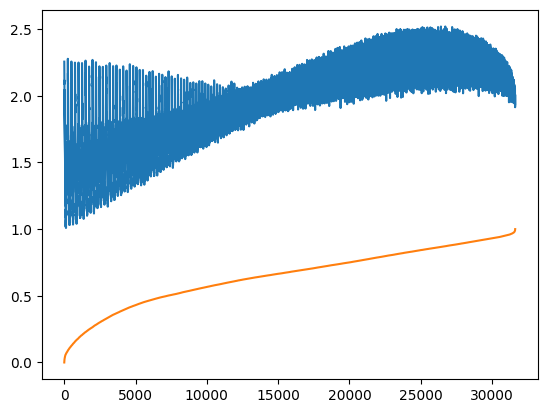

In [6]:
plt.plot(y)
print(type(y))
y_norm= (y-min(y))/(max(y)-min(y))
y_norm.sort()
plt.plot(y_norm)

(array([  22.,   63.,  149.,  188.,  218.,  250.,  273.,  334.,  375.,
         397.,  447.,  462.,  528.,  581.,  677.,  761.,  941., 1189.,
        1149., 1219., 1289., 1397., 1639., 1676., 1671., 1645., 1586.,
        1516., 1584., 1642., 1654., 1578., 1504.,  880.,  142.]),
 array([0.  , 0.03, 0.06, 0.09, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29,
        0.31, 0.34, 0.37, 0.4 , 0.43, 0.46, 0.49, 0.51, 0.54, 0.57, 0.6 ,
        0.63, 0.66, 0.69, 0.71, 0.74, 0.77, 0.8 , 0.83, 0.86, 0.89, 0.91,
        0.94, 0.97, 1.  ]),
 <BarContainer object of 35 artists>)

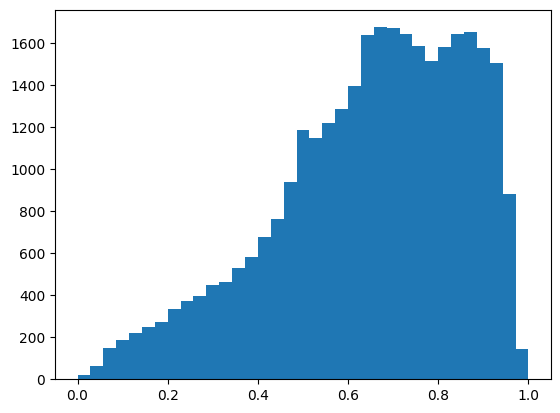

In [7]:
plt.hist(y_norm, 35)

In [8]:
ind_x = []
rank = []
for _ in range(len(x)): ind_x.append(_)
ind_x_rnd = ind_x
random.shuffle(ind_x_rnd)
print(ind_x_rnd)

[18866, 22060, 12100, 2366, 7423, 7274, 17798, 17520, 11889, 15572, 24130, 2534, 148, 29401, 14230, 13794, 9827, 16438, 18302, 29037, 9773, 6783, 10105, 18142, 8142, 15876, 22268, 14715, 12743, 8713, 15423, 30498, 9496, 28125, 22628, 26291, 22808, 16681, 22265, 5166, 3103, 29160, 30170, 9134, 11813, 13650, 22203, 23624, 6871, 8982, 15860, 15013, 10141, 25735, 18314, 2836, 18966, 27915, 680, 998, 8563, 11581, 10957, 28425, 17739, 1970, 4947, 1509, 15120, 26475, 3042, 5499, 29718, 29072, 26365, 10208, 14348, 10066, 20315, 13219, 23941, 17854, 1469, 23819, 1271, 29577, 845, 2263, 20220, 22928, 15565, 30725, 1101, 13493, 20395, 8134, 25374, 28005, 25875, 17493, 4250, 8416, 19838, 21449, 14097, 10749, 8528, 10278, 26883, 6323, 9875, 12417, 12519, 14346, 2311, 26364, 22161, 14839, 6346, 15238, 30378, 21835, 15722, 391, 4811, 31106, 5515, 3972, 4968, 31037, 13886, 17737, 92, 3632, 18704, 3648, 729, 29372, 4445, 21978, 16815, 24193, 2592, 13643, 9506, 13024, 21321, 16298, 20722, 15417, 9986, 2

[1, 1, 1, 29]
[1, 1, 1, 1]


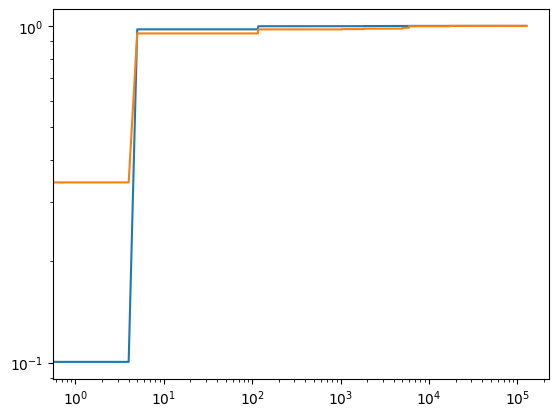

In [33]:
num_MC_sim = 500
perfomance_th = [0.5, 0.75, 0.85, 0.95]

result_MC_sim = []
result_MC_sim_rank = []

for i_MC in range(num_MC_sim):

  random.shuffle(ind_x_rnd)
  sam_x = y_norm[ind_x_rnd]

  track= []
  r_track=[]
  per_track, r_per_track = [0]*len(perfomance_th), [0]*len(perfomance_th)

  for ia in range(len(sam_x)):
    if ia == 0:
      loop_max = sam_x[ia]
      loop_rank = ind_x_rnd[ia]
      track.append(loop_max)
      r_track.append(loop_rank/(len(ind_x_rnd)-1))
    else:
      if sam_x[ia]>loop_max:
        loop_max = sam_x[ia]
        loop_rank = ind_x_rnd[ia]

    for ic in range(len(perfomance_th)):
      if sam_x[ia] >= perfomance_th[ic] and per_track[ic] == 0:
        per_track[ic] = ia
      if ind_x_rnd[ia] >= perfomance_th[ic]*len(sam_x) and r_per_track[ic] == 0:
        r_per_track[ic] = ia

      track.append(loop_max)
      r_track.append(loop_rank/(len(ind_x_rnd)-1))
      result_MC_sim.append(per_track)
      result_MC_sim_rank.append(r_per_track)


plt.yscale("log")
plt.xscale("log")
plt.plot(r_track)
#plt.plot(sam_x)
plt.plot(track)
print(per_track)
print(r_per_track)

In [2]:
print(len(result_MC_sim_rank))

NameError: ignored

In [34]:
#results_MC_simT = [[result_MC_sim[j][i] for j in range(len(result_MC_sim))] for i in range(len(result_MC_sim[0]))]
results_MC_simT_rank = [[result_MC_sim_rank [j][i] for j in range(len(result_MC_sim_rank ))] for i in range(len(result_MC_sim_rank [0]))]

cfd, cfd_rank = [], []
for iaMC in range(len(results_MC_simT_rank)):
  cfd.append(np.cumsum(np.histogram(results_MC_simT_rank[iaMC], bins='auto')[0]))
  #cfd.append(calculate_cfd(results_MC_simT[iaMC]))
  #cfd_rank.append(calculate_cfd(results_MC_simT_rank[iaMC]))

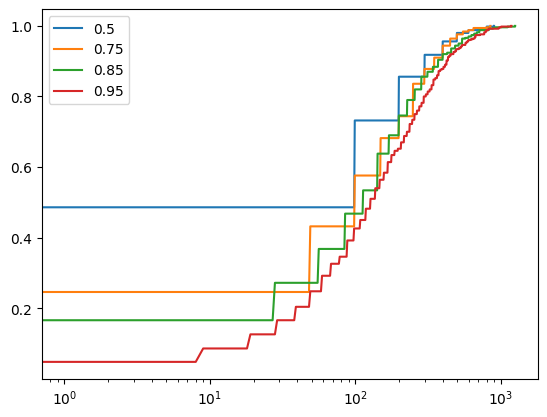

In [35]:
for _ in range(len(cfd)):
  plt.plot(cfd[_]/max(cfd[_]), label = perfomance_th[_])

plt.xscale("log")
#lt.yscale("log")
plt.legend()

In [ ]:
'''initial_X = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1],
                    [0.5, 0.5, 0], [0, 0.5, 0.5], [0.5, 0, 0.5]
                    ])'''
# Number of arrays to randomly sample
num_arrays_to_sample = 100  # You can adjust this as needed

# Randomly choose one or more arrays from the nested array
random_arrays_indices = np.random.choice(x.shape[0], size=num_arrays_to_sample, replace=False)
random_arrays = x[random_arrays_indices]
initial_X = random_arrays

initial_y = []
for i in initial_X:
    indice = np.where(np.all(x == i, axis=1))[0][0]
    initial_y.append(y[indice])

initial_y = np.array(initial_y)

X_train, y_train = initial_X, initial_y

Optimal Hyperparameters: [0.23 3.   0.8 ]


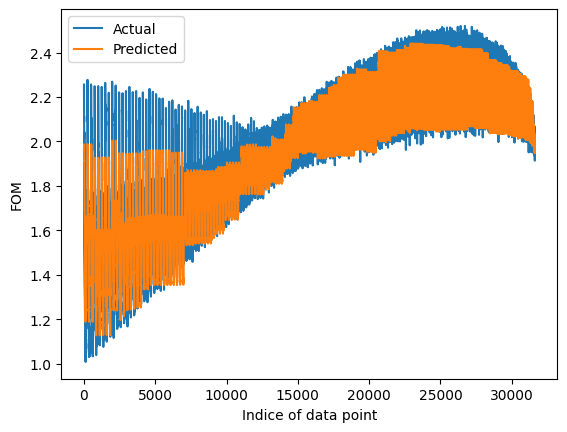

In [ ]:
# Define the XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror")

# Define the objective function for XGBoost training
def xgb_objective(params):
    learning_rate, max_depth, subsample = params
    model.set_params(learning_rate=learning_rate, max_depth=int(round(max_depth)), subsample=subsample)

    model.fit(X_train, y_train)
    predictions = model.predict(X_train)

    mse = mean_squared_error(y_train, predictions)
    return mse

# Define the search space for hyperparameters
space = [(0.01, 0.3),  # learning_rate
         (3, 10),       # max_depth
         (0.5, 1.0)]     # subsample

# Minimize the XGBoost objective function
result = minimize(xgb_objective, x0=[0.1, 0.1, 0.8], bounds=space, method="L-BFGS-B")

# Get the optimal hyperparameters
optimal_params = result.x
print("Optimal Hyperparameters:", optimal_params)

# Set the XGBoost model with the optimal hyperparameters
optimal_learning_rate, optimal_max_depth, optimal_subsample = optimal_params
model.set_params(learning_rate=optimal_learning_rate, max_depth=int(round(optimal_max_depth)), subsample=optimal_subsample)

# Train the final model with optimal hyperparameters
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(x)

plt.plot(y)
plt.plot(y_val_pred)
plt.xlabel('Indice of data point')
plt.ylabel('FOM')
plt.legend(['Actual', 'Predicted'])

In [ ]:
# Train initial Gaussian Process (GP) model
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(1.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel,
                                    optimizer='fmin_l_bfgs_b',
                                    n_restarts_optimizer=30,
                                    alpha=1e-3,
                                    normalize_y=True)

#model.fit(initial_X, initial_y)

In [ ]:
# Expected Improvement-based active learning function
def EI_learning(candidates, y_pred, pred_std):
    """Active learning function based on expected improvement

       This function selects a new sample from candidate pool to enrich the current training dataset.
       The sample gets selected if it has the maximum expected improvement value.

       Input:
       - candidates: pool of candidates to select sample from
       - y_pred: GP predictions on candidate samples
       - pred_std: Standard deviation of the GP predictions on candidate samples

       Output:
       - new_sample: the selected sample with the maximum expected improvement value
       - EI: EI values of the candidate samples
    """

    # 1-Find the current maxima
    current_objective = y_pred[np.argmax(y_pred)]

    # 2-Calculate the EI values of the candidate samples
    #pred_std = pred_std.reshape(pred_std.shape[0], 1)
    EI = (current_objective-y_pred)*st.norm.cdf((current_objective-y_pred)/pred_std) \
            +pred_std*st.norm.pdf((current_objective-y_pred)/pred_std)

    # 3-Select a new sample
    new_sample = candidates[np.argmax(EI)]

    return new_sample, EI

In [ ]:
#iterate 5 times and see results change

n_iterations = 5
y_pred_arr, EI_arr = [], []

for c in range(n_iterations):
    print('-----------------------------------------------')
    print("Iteration : {}".format(c))
    model.fit(initial_X, initial_y)
    y_pred, pred_std = model.predict(X_norm, return_std=True)
    y_pred_arr.append(y_pred)

    pred_std = pred_std.flatten()

    index = np.argmax(y_pred)
    current_location = X_norm[index]
    current_objective = y_pred[index]
    print("Current location : {}".format(current_location))
    print("Current objective value : {}".format(current_objective))
    print("Targeted objective value : {}".format(y[np.argmax(y)]))

    new_sample, EI_new = EI_learning(X_norm, y_pred, pred_std)
    EI_arr.append(EI_new)
    print("Next best data point : {}".format(new_sample))

    initial_X = np.vstack([initial_X, new_sample])
    initial_y = []

    for i in initial_X:
        indice = np.where(np.all(X_norm == i, axis = 1))[0][0]
        initial_y.append(y[indice])

    initial_y = np.array(initial_y)

-----------------------------------------------
Iteration : 0
Current location : [0.65 0.24 0.11]
Current objective value : 4.9584355328083545
Targeted objective value : 7.550369650888264
Next best data point : [0.62 0.   0.38]
-----------------------------------------------
Iteration : 1
Current location : [0.61 0.39 0.  ]
Current objective value : 5.312952831098944
Targeted objective value : 7.550369650888264
Next best data point : [0.42 0.   0.58]
-----------------------------------------------
Iteration : 2
Current location : [0.4 0.6 0. ]
Current objective value : 5.747665924521465
Targeted objective value : 7.550369650888264
Next best data point : [0.09 0.   0.91]
-----------------------------------------------
Iteration : 3
Current location : [0. 1. 0.]
Current objective value : 6.948426662129007
Targeted objective value : 7.550369650888264
Next best data point : [0. 0. 1.]
-----------------------------------------------
Iteration : 4
Current location : [0. 1. 0.]
Current object

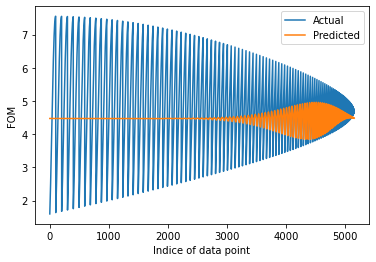

In [ ]:
plt.plot(y)
plt.plot(y_pred_arr[0])
plt.xlabel('Indice of data point')
plt.ylabel('FOM')
plt.legend(['Actual', 'Predicted'])

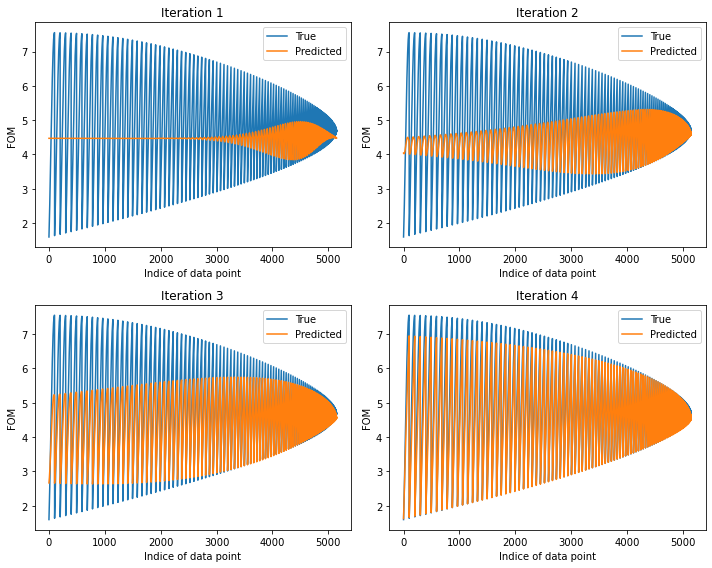

In [ ]:
plt.figure(figsize=(10, 8))

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.plot(y)
    plt.plot(y_pred_arr[i-1])
    plt.xlabel('Indice of data point')
    plt.ylabel('FOM')
    plt.legend(['True', 'Predicted'], loc = 'upper right') #commented out because legend takes a lot of space
    plt.title('Iteration {}'.format(i))

plt.tight_layout()
plt.show()